# Fig 1. Training Curves

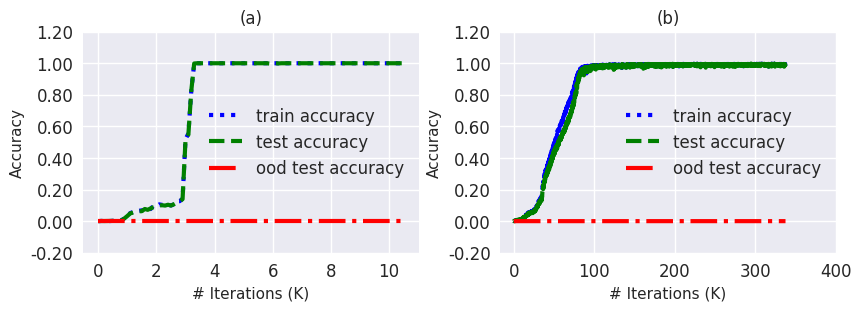

In [15]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np


n_row = 1
n_col = 2
tag_list = ['train_score/train_score', 'test_score/test_score', 'ood_test_score/ood_test_score', 'train_loss/train_loss']
label_list = ['train accuracy', 'test accuracy', 'ood test accuracy']

fig, axs = plt.subplots(ncols=n_col, nrows=n_row, figsize=(8.5, 3.0), layout='constrained')
plt.style.use('seaborn')

colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
              'navy', 'lime', 'magenta', 'gold', 'teal', 'salmon', 'darkgreen', 'indigo', 'tomato', 'steelblue']
line_styles = [':', '--', '-.', '-'] * 5  # Repeat line styles to match the number of lines
markers = ['o', 's', 'D', 'v', '^', 'p', 'H', '*', '+', 'x'] * 2
fontsize = 12

# figure 1
log_dir = 'runs/addition_run_star2'

event_acc = event_accumulator.EventAccumulator(log_dir)
event_acc.Reload()

# Get the scalar values
scalars = {}
for tag in event_acc.Tags()['scalars']:
    # print(tag)
    event_list = event_acc.Scalars(tag)
    scalars[tag] = [(event.step, event.value) for event in event_list]
    
for j in range(3):
    tag = tag_list[j]
    values = [v for k, v in scalars.items() if tag in k]
    steps, value = zip(*values[0])
    value_list = [x/1e4 for x in list(value)]

    axs.flatten()[0].plot(steps, value_list, linewidth=3, color=colors[j], linestyle=line_styles[j])

axs.flatten()[0].set_xlabel('# Iterations (K)')
axs.flatten()[0].set_ylabel('Accuracy')
axs.flatten()[0].set_title('(a)', fontsize=fontsize)
# axs.flatten()[0].set_xlim(0, 1.173e7)
# axs.flatten()[0].set_ylim(-0.1, 1.1)
axs.flatten()[0].legend(label_list, fancybox=True, shadow=False, fontsize=fontsize)

# # set y-axis ticks to display original number
y_ticks = axs.flatten()[0].get_yticks()
y_ticklabels = [f'{tick:,.2f}' for tick in y_ticks]
axs.flatten()[0].set_yticks(y_ticks)
axs.flatten()[0].set_yticklabels(y_ticklabels, fontsize=fontsize)

x_ticks = axs.flatten()[0].get_xticks()
x_ticks = [i for i in x_ticks if i >= 0][:6]
x_ticklabels = [int(tick/1000) for tick in x_ticks]
axs.flatten()[0].set_xticks(x_ticks)
axs.flatten()[0].set_xticklabels(x_ticklabels, fontsize=fontsize)



# figure 2
log_dir = 'runs/multiplication_run_star1'

event_acc = event_accumulator.EventAccumulator(log_dir)
event_acc.Reload()

base_data_num = [50000, 5000, 500]

# Get the scalar values
scalars = {}
for tag in event_acc.Tags()['scalars']:
    # print(tag)
    event_list = event_acc.Scalars(tag)
    scalars[tag] = [(event.step, event.value) for event in event_list]
    
for j in range(3):
    tag = tag_list[j]
    values = [v for k, v in scalars.items() if tag in k]
    steps, value = zip(*values[0])
    value_list = [x/base_data_num[j] for x in list(value)]

    axs.flatten()[1].plot(steps, value_list, linewidth=3, color=colors[j], linestyle=line_styles[j])

axs.flatten()[1].set_xlabel(r'# Iterations (K)')
axs.flatten()[1].set_ylabel('Accuracy')
axs.flatten()[1].set_title('(b)', fontsize=fontsize)
# axs.flatten()[0].set_xlim(0, 1.173e7)
# axs.flatten()[0].set_ylim(-0.1, 1.1)
axs.flatten()[1].legend(label_list, fancybox=True, shadow=False, fontsize=fontsize)

# # set y-axis ticks to display original number
y_ticks = axs.flatten()[1].get_yticks()
y_ticklabels = [f'{tick:,.2f}' for tick in y_ticks]
axs.flatten()[1].set_yticks(y_ticks)
axs.flatten()[1].set_yticklabels(y_ticklabels, fontsize=fontsize)

# set x_tick label
x_ticks = axs.flatten()[1].get_xticks()
x_ticks = [i for i in x_ticks if i >= 0][:5]
x_ticklabels = [int(tick/1000) for tick in x_ticks]
axs.flatten()[1].set_xticks(x_ticks)
axs.flatten()[1].set_xticklabels(x_ticklabels, fontsize=fontsize)




plt.savefig(f'img/fig_training_curves.pdf', dpi=400)
plt.show()
plt.close()


# Fig 2. Algberiac Structure

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def arithmatic(ax, fig_title, addition=True, modular=False):
    # Create x and y data points
    x = np.linspace(0, 10000, 101, dtype=int)
    y = np.linspace(0, 10000, 101, dtype=int)
    x, y = np.meshgrid(x, y)

    # Calculate z values
    if (addition==True) and (modular==False):
        z = x + y
        contour_levels = 35 
    elif (addition==True) and (modular==True):
        z = (x % 1000) + (y % 1000)
        contour_levels = 10 
    elif (addition==False) and (modular==False):
        z = x * y
        contour_levels = 35 
    else:
        z = (x % 1000) * (y % 1000)
        contour_levels = 10 

    # Create contour plot
    img = ax.contour(x, y, z, levels=contour_levels, cmap='viridis')

    # Set labels and title
    ax.set_xlabel('a', fontsize=12)
    ax.set_ylabel('b', fontsize=12)
    ax.set_title(fig_title, fontsize=12)
    
    # Set the x-axis ticks and labels
    xticks = np.arange(0, 10001, 2000, dtype=int)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontsize=12)
    
    yticks = np.arange(0, 10001, 2000, dtype=int)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=12)


    return img



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from adder_v3 import *

def generated_addition(ax, fig_title):
    device =  torch.device(f"cuda" if torch.cuda.is_available() else "cpu")

    # get default config and overrides from the command line, if any
    config = get_config()
    # config.merge_from_args(sys.argv[1:])
    setup_logging(config)
    set_seed(config.system.seed)

    dataset = AdditionDataset(config.data, split='train')

    # construct the model
    config.model.vocab_size = dataset.get_vocab_size()
    config.model.block_size = dataset.get_block_size()
    model = GPT(config.model).to(device)

    try:
        model_path = f"{config.system.work_dir}/model_s2.pt"
        model.load_state_dict(torch.load(model_path))
        print("#### Model parameters are loaded!!!!. ####")
    except:
        print(f"{config.system.work_dir}/model_s2.pt")
        pass

    model.eval()

    ndigit = 5
    xs = np.linspace(0, 10000, 101, dtype=int)
    ys = np.linspace(0, 10000, 101, dtype=int)

    X, Y = np.meshgrid(xs, ys)
    
    try:
        Z = torch.load('tensor_Z_add.pt')
    except:
        Z = np.ndarray((len(xs),len(ys), 3))

        for i, x in enumerate(xs):
            for j, y in enumerate(ys):
                astr = f'%0{ndigit}d' % x
                bstr = f'%0{ndigit}d' % y
                render = astr + bstr
                d1d2 = np.array([[int(char) for char in render]])
                d1d2 = torch.from_numpy(d1d2).to(device)

                # let the model sample the rest of the sequence
                factors = torch.tensor([[10**i for i in range(ndigit+1)][::-1]]).to(device)
                d1d2d3 = model.generate(d1d2, ndigit+1, do_sample=False)
                # isolate the last digit of the sampled sequence
                d3 = d1d2d3[:, -(ndigit+1):]
                d3 = d3.flip(1)  # reverse the digits to their "normal" order
                # decode the integers from individual digits
                d1i = (d1d2[:, :ndigit] * factors[:, 1:]).sum(1)
                d2i = (d1d2[:, ndigit:ndigit*2] * factors[:, 1:]).sum(1)
                d3i_pred = (d3 * factors).sum(1)
                d3i_gt = d1i + d2i  # manually calculate the ground truth

                error = d3i_pred - d3i_gt
                Z[i][j][0] = torch.squeeze(d3i_pred)
                Z[i][j][1] = torch.squeeze(d3i_gt)
                Z[i][j][2] = torch.squeeze(error)


        torch.save(Z, 'tensor_Z_add.pt')
    
    # Create contour plot
    contour_levels = 10  # Number of contour lines
    img = ax.contour(X, Y, Z[:,:,0].T, levels=contour_levels, cmap='viridis')
    # plt.contour(X, Y, Z_mod_error, levels=contour_levels, cmap='viridis')

    # Set labels and title
    ax.set_xlabel('a', fontsize=12)
    ax.set_ylabel('b', fontsize=12)
    ax.set_title(fig_title, fontsize=12)

    # Set the x-axis ticks and labels
    xticks = np.arange(0, 10001, 2000, dtype=int)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontsize=12)

    yticks = np.arange(0, 10001, 2000, dtype=int)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=12)

    return img



In [180]:
import numpy as np

# Create a 2D NumPy array
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Find the index of a value, let's say 5
index = np.where(arr == 5)

# Print the index
print(index)

(array([1]), array([1]))


In [9]:
Z_ = torch.load('tensor_Z_add.pt')

# Create x and y data points
x = np.linspace(0, 10000, 100, dtype=int)
y = np.linspace(0, 10000, 100, dtype=int)
x, y = np.meshgrid(x, y)

# Calculate z values
# z = x + y
z_mod = (x % 1000) + (y % 1000)

z_model = Z_[:,:,0].T
Z_mod_error = Z_[:,:,0].T-z_mod
aaa = np.max(Z_mod_error)
print(aaa)
index = np.where(Z_mod_error==aaa)
print(index)

print(x[index])
print(y[index])
print(z_model[index])

FileNotFoundError: [Errno 2] No such file or directory: 'tensor_Z_add.pt'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from multiplication_v3 import *

def generated_multiplication(ax, fig_title):
    device =  torch.device(f"cuda" if torch.cuda.is_available() else "cpu")

    # get default config and overrides from the command line, if any
    config = get_config()
    # config.merge_from_args(sys.argv[1:])
    setup_logging(config)
    set_seed(config.system.seed)

    dataset = MultiplicationDataset(config.data, split='train')

    # construct the model
    config.model.vocab_size = dataset.get_vocab_size()
    config.model.block_size = dataset.get_block_size()
    model = GPT(config.model).to(device)

    try:
        model_path = f"{config.system.work_dir}/model_s2.pt"
        model.load_state_dict(torch.load(model_path))
        print("#### Model parameters are loaded. ####")
    except:
        pass

    model.eval()

    ndigit = 5
    xs = np.linspace(0, 10000, 101, dtype=int)
    ys = np.linspace(0, 10000, 101, dtype=int)

    X, Y = np.meshgrid(xs, ys)
    try:
        Z = torch.load("tensor_Z_multiply.pt")
    except:
        Z = np.ndarray((len(xs),len(ys), 3))

        for i, x in enumerate(xs):
            for j, y in enumerate(ys):
                astr = f'%0{ndigit}d' % x
                bstr = f'%0{ndigit}d' % y
                render = astr + bstr
                d1d2 = np.array([[int(char) for char in render]])
                d1d2 = torch.from_numpy(d1d2).to(device)

                # let the model sample the rest of the sequence
                factors = torch.tensor([[10**i for i in range(ndigit*2)][::-1]]).to(device)
                d1d2d3 = model.generate(d1d2, ndigit*2, do_sample=False)
                # isolate the last digit of the sampled sequence
                d3 = d1d2d3[:, -(ndigit*2):]
                d3 = d3.flip(1)  # reverse the digits to their "normal" order
                # decode the integers from individual digits
                d1i = (d1d2[:, :ndigit] * factors[:, -ndigit:]).sum(1)
                d2i = (d1d2[:, ndigit:ndigit*2] * factors[:, -ndigit:]).sum(1)
                d3i_pred = (d3 * factors).sum(1)
                d3i_gt = d1i * d2i  # manually calculate the ground truth

                error = d3i_pred - d3i_gt
                Z[i][j][0] = torch.squeeze(d3i_pred)
                Z[i][j][1] = torch.squeeze(d3i_gt)
                Z[i][j][2] = torch.squeeze(error)

        torch.save(Z, 'tensor_Z_multiply.pt')


    # Create contour plot
    contour_levels = 10  # Number of contour lines
    img = ax.contour(X, Y, Z[:,:,0].T, levels=contour_levels, cmap='viridis')
    
    # Set labels and title
    ax.set_xlabel('a', fontsize=12)
    ax.set_ylabel('b', fontsize=12)
    ax.set_title(fig_title, fontsize=12)

    # Set the x-axis ticks and labels
    xticks = np.arange(0, 10001, 2000, dtype=int)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, fontsize=12)

    yticks = np.arange(0, 10001, 2000, dtype=int)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=12)

    return img


number of parameters: 0.09M
#### Model parameters are loaded!!!!. ####
number of parameters: 0.09M


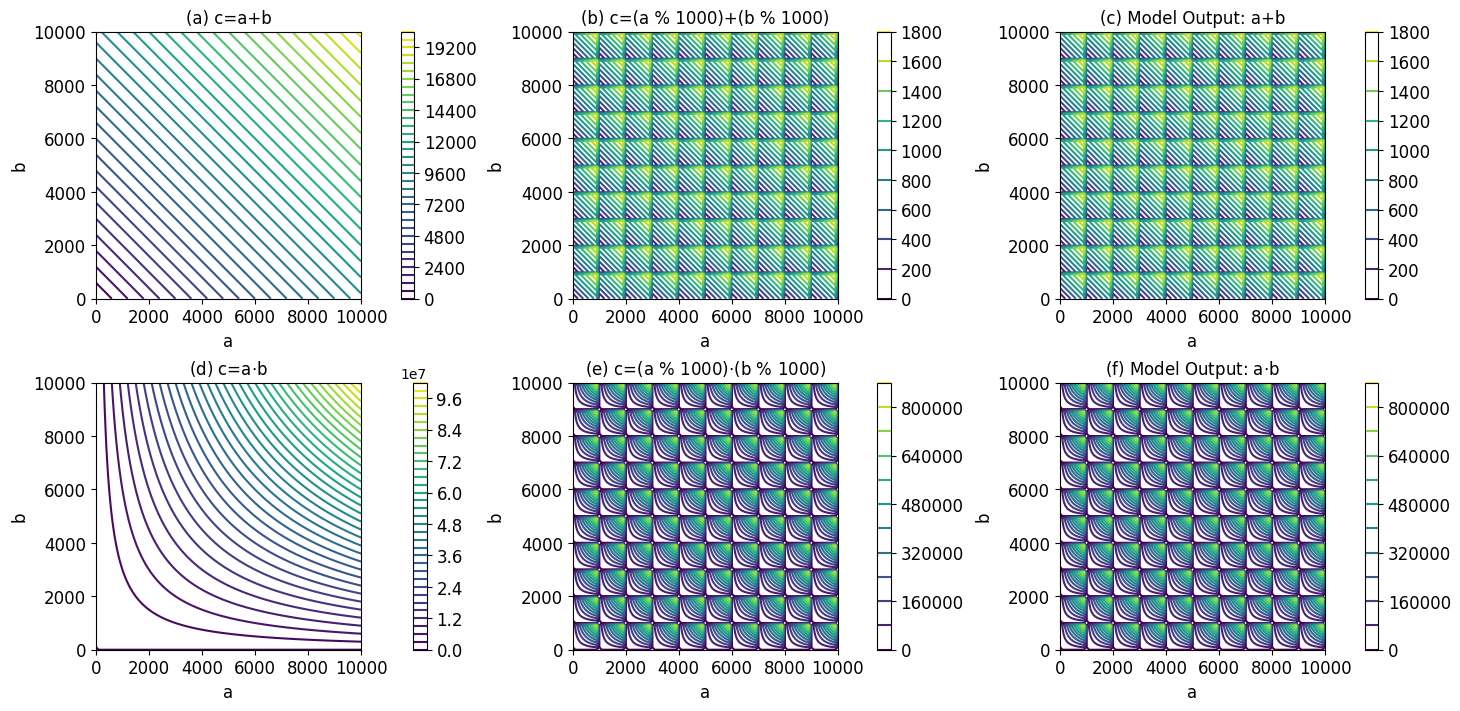

In [7]:
import matplotlib.pyplot as plt
import numpy as np


n_row = 2
n_col = 3
fig_num = n_row*n_col
fig_title = ['(a) c=a+b', '(b) c=(a % 1000)+(b % 1000)', '(c) Model Output: a+b', r'(d) c=a$\cdot$b', r'(e) c=(a % 1000)$\cdot$(b % 1000)', r'(f) Model Output: a$\cdot$b']
arith_list = [True, True, True, False, False, False]
mod_list = [False, True, True, False, True, True]


fig, axs = plt.subplots(ncols=n_col, nrows=n_row, figsize=(14.5, 7.0), layout='constrained')
plt.style.use('default')
for i in range(fig_num):
    # img = prob_heatmap(axs.flatten()[i], a=a_list[i], b=b_list[i], title=title_list[i])
    if i not in [2, 5]:
        img = arithmatic(axs.flatten()[i], fig_title[i], addition=arith_list[i], modular=mod_list[i])
    elif i ==2:
        img = generated_addition(axs.flatten()[i], fig_title[i])
    else:
        img = generated_multiplication(axs.flatten()[i], fig_title[i])
    
    cbar = plt.colorbar(img, ax=axs.flatten()[i])
    cbar.ax.tick_params(labelsize=12)  # Set font size of colorbar labels to 20

    
plt.savefig(f'img/fig_aggregate_add_multiply.pdf', dpi=400)
plt.show()
plt.close()


# Figure 3. Probability Distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from adder_v3 import *

device =  torch.device(f"cuda" if torch.cuda.is_available() else "cpu")

# get default config and overrides from the command line, if any
config = get_config()
# config.merge_from_args(sys.argv[1:])
setup_logging(config)
set_seed(config.system.seed)

dataset = AdditionDataset(config.data, split='train')

# construct the model
config.model.vocab_size = dataset.get_vocab_size()
config.model.block_size = dataset.get_block_size()
model = GPT(config.model).to(device)

try:
    model_path = f"{config.system.work_dir}/model_s2.pt"
    model.load_state_dict(torch.load(model_path))
    print("#### Model parameters are loaded. ####")
except:
    pass

model.eval()

In [26]:
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt


def prob_heatmap(ax, a, b, title, ndigit=5):
    # ndigit = 5
    # a, b = 1349, 705
    astr = f'%0{ndigit}d' % a
    bstr = f'%0{ndigit}d' % b
    render = astr + bstr
    d1d2 = np.array([[int(char) for char in render]])
    d1d2 = torch.from_numpy(d1d2).to(device)
    # let the model sample the rest of the sequence

    model.eval()

    factors = torch.tensor([[10**i for i in range(ndigit+1)][::-1]]).to(device)
    d1d2d3 = model.generate(d1d2, ndigit+1, do_sample=False)
    # print(d1d2d3)
    # isolate the last digit of the sampled sequence
    d3 = d1d2d3[:, -(ndigit+1):]
    d3 = d3.flip(1)  # reverse the digits to their "normal" order
    # decode the integers from individual digits
    d1i = (d1d2[:, :ndigit] * factors[:, 1:]).sum(1)
    d2i = (d1d2[:, ndigit:ndigit*2] * factors[:, 1:]).sum(1)
    d3i_pred = (d3 * factors).sum(1)
    d3i_gt = d1i + d2i  # manually calculate the ground truth

    error = d3i_pred - d3i_gt
    # print(d3i_pred, d3i_gt)

    model.eval()
    with torch.no_grad():
        logits, _ = model(d1d2d3[:,:-1])

    # print(logits.shape)  # shape: batch_size X input_length X vocab_size
    # print(logits)

    # logits = logits[:, -1, :]
    probs = F.softmax(logits, dim=-1)
    # print(logits.shape)
    # print(logits)
    # print(probs)

    # 将PyTorch张量转换为NumPy数组
    probs_ = probs.cpu().numpy()

    # 绘制热力图
    img = ax.imshow(probs_[0].T, cmap='Oranges', interpolation='nearest')  # Oranges
    # Plot a vertical line at x = 8.5
    ax.axvline(x=8.5, color='Black', linestyle='--')
    ax.set_xlabel('Position of Sequence', fontsize=14)
    ax.set_ylabel('Vocabulary', fontsize=14)
    # predstr = f'%0{ndigit+1}d' % d3i_pred.item()
    # plt.title(f'{astr}+{bstr}, output: {predstr}')
    ax.set_title(title, fontsize=14)
    # plt.colorbar()
    # plt.show()
    
    return img

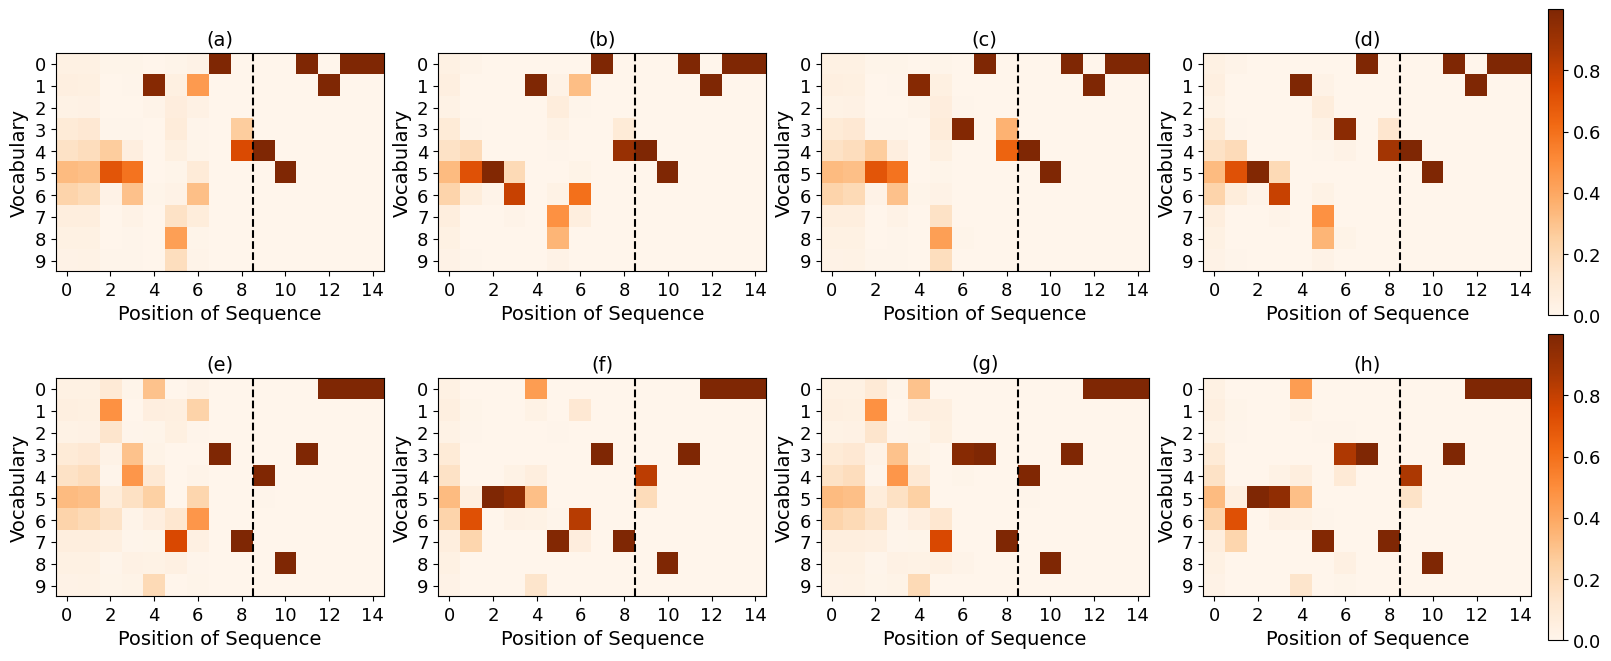

In [40]:
import matplotlib.pyplot as plt
import numpy as np


n_row = 2
n_col = 4
fig_num = n_row*n_col
title_list = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
a_list = [349, 1349, 349, 1349, 128, 3128, 128, 3128]
b_list = [705, 705, 2705, 2705, 256, 256, 4256, 4256]

fig, axs = plt.subplots(ncols=n_col, nrows=n_row, figsize=(16.0, 6.5), layout='constrained')
plt.style.use('default')
for i in range(fig_num):
    img = prob_heatmap(axs.flatten()[i], a=a_list[i], b=b_list[i], title=title_list[i])
    if i in [3, 7]:
        cbar = plt.colorbar(img, ax=axs.flatten()[i])
        cbar.ax.tick_params(labelsize=13) 

    y_ticks = np.arange(0, 10)
    axs.flatten()[i].set_yticks(y_ticks)
    axs.flatten()[i].set_yticklabels(y_ticks, fontsize=13)
    
    x_ticks = np.arange(0, 15, 2)
    axs.flatten()[i].set_xticks(x_ticks)
    axs.flatten()[i].set_xticklabels(x_ticks, fontsize=13)
    
# plt.savefig(f'img/fig_addition_probs.pdf', dpi=400)
plt.show()
plt.close()


# Figure 4. 3D Representation

In [127]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from adder_v3 import *

device =  torch.device(f"cuda:2" if torch.cuda.is_available() else "cpu")

def plot_model_pca3(subplot, model_name, num_interval=100, fig_title='3D Plot'):
    
    fontsize = 18
    
    # get default config and overrides from the command line, if any
    config = get_config()
    # config.merge_from_args(sys.argv[1:])
    setup_logging(config)
    set_seed(config.system.seed)

    dataset = AdditionDataset(config.data, split='train')

    # construct the model
    config.model.vocab_size = dataset.get_vocab_size()
    config.model.block_size = dataset.get_block_size()
    model = GPT(config.model).to(device)

    try:
        model_path = f"{config.system.work_dir}/{model_name}"
        model.load_state_dict(torch.load(model_path))
        # print("#### Model parameters are loaded. ####")
    except:
        pass

    model.eval()


    ndigit = 5
    n_points = 10000
    # num_interval = 105
    xs = np.linspace(0, n_points, num_interval, dtype=int)
    ys = np.linspace(0, n_points, num_interval, dtype=int)

    X, Y = np.meshgrid(xs, ys)
    Z = np.ndarray((len(xs),len(ys), 3))

    model.eval()

    labels = []
    d1d2_list = torch.Tensor([]).to(device)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            astr = f'%0{ndigit}d' % x
            bstr = f'%0{ndigit}d' % y
            render = astr + bstr
            d1d2 = np.array([[int(char) for char in render]])
            d1d2 = torch.from_numpy(d1d2).to(device)
            d1d2_list = torch.cat([d1d2_list, d1d2], dim=0)
            # temp =  (x % 1000) + (y % 1000)  # (int(x % 1000), int(y % 1000))
            temp = (x+y) % 10
            labels.append(temp)

    d1d2_list = d1d2_list.to(torch.int)
    # print(d1d2_list.shape)

    with torch.no_grad():
        model(d1d2_list)
        # probs = F.softmax(logits, dim=-1)
        seq_emb = model.last_emb
        # # seq_emb_cat = seq_emb.view((len(xs)*len(ys),-1))
        seq_emb_cat = seq_emb[:,-1,:]
        # # seq_emb_cat = seq_emb_cat/torch.norm(seq_emb_cat, p=2, dim=0)

    # print(seq_emb.shape)
    # print(seq_emb_cat.shape)

    # Convert tensor to numpy array
    seq_emb_cat_ = seq_emb_cat.cpu().numpy()

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=3)
    projected_seq_emb_cat = pca.fit_transform(seq_emb_cat_)

    # Create a list of unique labels
    # labels = list(map(int, labels))  # Convert labels to integers
    unique_labels = list(set(labels))

    # Assign colors to each label
    colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#008000', '#00FFFF', '#0000FF', '#800080', '#FF00FF', '#FFC0CB',
              '#800000', '#FF4500', '#FFFFE0', '#32CD32', '#40E0D0', '#0000CD', '#9932CC', '#FF1493', '#A52A2A', '#BDB76B',
              '#8B4513', '#7B68EE', '#8A2BE2', '#3CB371', '#FF69B4', '#ADFF2F', '#87CEEB', '#228B22', '#9ACD32', '#F08080',
              '#F0E68C', '#DDA0DD', '#48D1CC', '#4682B4', '#9F79EE', '#6A5ACD', '#87CEFA', '#20B2AA', '#3D9970', '#FF6347']

    # Plot the projected data with different colors for each label
    for idx, label in enumerate(unique_labels):
        indices = [i for i, l in enumerate(labels) if l == label]
        subplot.scatter(projected_seq_emb_cat[indices, 0], projected_seq_emb_cat[indices, 1], projected_seq_emb_cat[indices, 2], 
                color=colors[idx%(len(colors))], label=f'Label {label}')

        if model_name == 'model_s2.pt':
            # Add labels on the plot for each point
            max_idx = np.argmax(projected_seq_emb_cat[indices], axis=0)
            # print(max_indice_idx)

            subplot.text(projected_seq_emb_cat[indices[max_idx[0]], 0], projected_seq_emb_cat[indices[max_idx[0]], 1], projected_seq_emb_cat[indices[max_idx[0]], 2]-3, 
             str(label), fontsize=12, ha='center', va='bottom')
    
    subplot.set_xlabel('Component 1', fontsize=fontsize-2)
    subplot.set_ylabel('Component 2', fontsize=fontsize-2)
    if model_name == 'model_s2.pt':
        subplot.set_zlabel('Component 3', fontsize=fontsize-2)
    subplot.set_title(fig_title, fontsize=fontsize)
    
#     # # set y-axis ticks to display original number
#     z_ticks = subplot.get_zticks()
#     z_ticks = [i for i in z_ticks]
#     z_ticklabels = [tick for tick in z_ticks]
#     subplot.set_zticks(z_ticks)
#     subplot.set_zticklabels(z_ticklabels, fontsize=14)
    
#     # # set y-axis ticks to display original number
#     y_ticks = subplot.get_yticks()
#     y_ticks = [i for i in y_ticks]
#     y_ticklabels = [tick for tick in y_ticks]
#     subplot.set_yticks(y_ticks)
#     subplot.set_yticklabels(y_ticklabels, fontsize=14, rotation=20)

#     # set x_tick label
#     x_ticks = subplot.get_xticks()
#     x_ticks = [i for i in x_ticks]
#     x_ticklabels = [tick for tick in x_ticks]
#     subplot.set_xticks(x_ticks)
#     subplot.set_xticklabels(x_ticklabels, fontsize=14, rotation=20)

    # subplot.show()

number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M


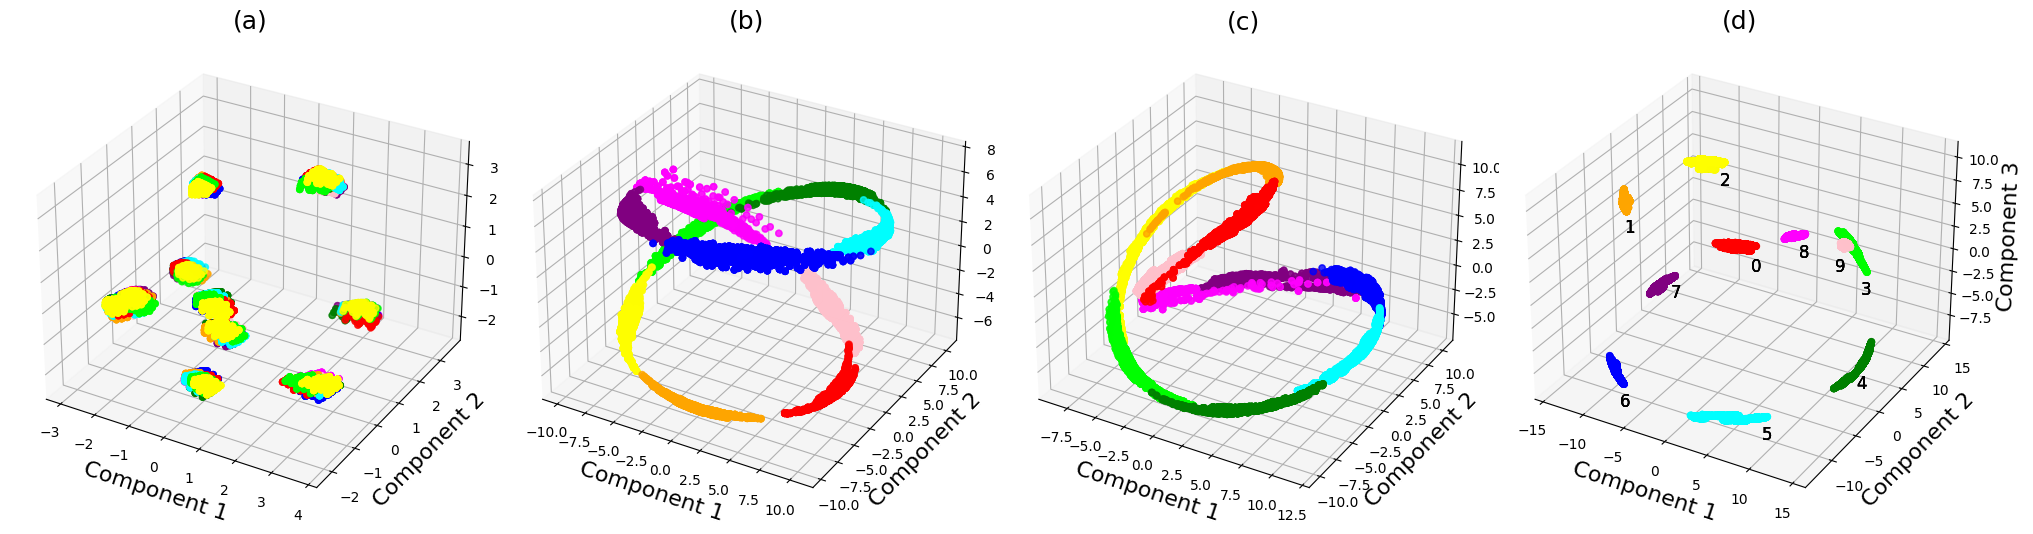

In [136]:
n_row = 1
n_col = 4
fig_num = n_row*n_col
model_list = ['model_0.pt', 'model_14.pt', 'model_51.pt', 'model_s2.pt']
title_list = ['(a)', '(b)', '(c)', '(d)']


# Create the figure and subplots
fig = plt.figure(figsize=(20.0, 7.0))
subplots = fig.subplots(ncols=n_col, nrows=n_row,subplot_kw={'projection': '3d'})

# fig, ax = plt.subplots(ncols=n_col, nrows=n_row, figsize=(16.0, 6.5), layout='constrained')
for i, row in enumerate(subplots):
    for j, subplot in enumerate(np.ravel(subplots)):
        plot_model_pca3(subplot, model_list[j], num_interval=100, fig_title=title_list[j])

# Adjust spacing between subplots
fig.tight_layout()

plt.savefig(f'img/fig_addition_representation_pca.pdf', dpi=100, bbox_inches='tight')
plt.show()
plt.close()

# Figure 5. Representation: PCA 1-4

In [8]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from adder_v3 import *

device =  torch.device(f"cuda:2" if torch.cuda.is_available() else "cpu")

def plot_model_represent_contour(subplot, model_name, id_pca=0, num_interval=100, fig_title='3D Plot'):
    
    # get default config and overrides from the command line, if any
    config = get_config()
    # config.merge_from_args(sys.argv[1:])
    setup_logging(config)
    set_seed(config.system.seed)

    dataset = AdditionDataset(config.data, split='train')

    # construct the model
    config.model.vocab_size = dataset.get_vocab_size()
    config.model.block_size = dataset.get_block_size()
    model = GPT(config.model).to(device)

    try:
        model_path = f"{config.system.work_dir}/{model_name}"
        model.load_state_dict(torch.load(model_path))
        # print("#### Model parameters are loaded. ####")
    except:
        pass

    model.eval()

    
    ndigit = 5
    n_points = 10000
    # num_interval = 105
    xs = np.linspace(0, n_points, num_interval)
    ys = np.linspace(0, n_points, num_interval)

    X, Y = np.meshgrid(xs, ys)
    Z = np.ndarray((len(xs),len(ys), 3))

    model.eval()

    # labels = []
    d1d2_list = torch.Tensor([]).to(device)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            astr = f'%0{ndigit}d' % x
            bstr = f'%0{ndigit}d' % y
            render = astr + bstr
            d1d2 = np.array([[int(char) for char in render]])
            d1d2 = torch.from_numpy(d1d2).to(device)
            d1d2_list = torch.cat([d1d2_list, d1d2], dim=0)

    d1d2_list = d1d2_list.to(torch.int)

    with torch.no_grad():
        model(d1d2_list)
        seq_emb = model.last_emb
        seq_emb_cat = seq_emb[:,-1,:]


    # Convert tensor to numpy array
    seq_emb_cat_ = seq_emb_cat.cpu().numpy()

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=10)
    projected_seq_emb_cat = pca.fit_transform(seq_emb_cat_)

    # Obtain the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    Z = projected_seq_emb_cat[:, id_pca].reshape(num_interval, num_interval)
    
    # Create contour plot
    contour_levels = 5  # Number of contour lines
    img = subplot.contour(X, Y, Z.T, levels=contour_levels, cmap='viridis')


    # Add grid lines
    subplot.grid(True, which='both', color='black', linestyle='-', linewidth=2.0)
    fontsize = 15
    
    xticks = np.arange(0, 10001, 1000, dtype=int)
    subplot.set_xticks(xticks)
    subplot.set_xticklabels(xticks, fontsize=fontsize, rotation=60)
    
    yticks = np.arange(0, 10001, 1000, dtype=int)
    subplot.set_yticks(yticks)
    subplot.set_yticklabels(yticks, fontsize=fontsize)

    # Set labels and title
    subplot.set_xlabel('a', fontsize=fontsize)
    subplot.set_ylabel('b', fontsize=fontsize)
    subplot.set_title(fig_title, fontsize=fontsize)
    
    return img


number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M
number of parameters: 0.09M


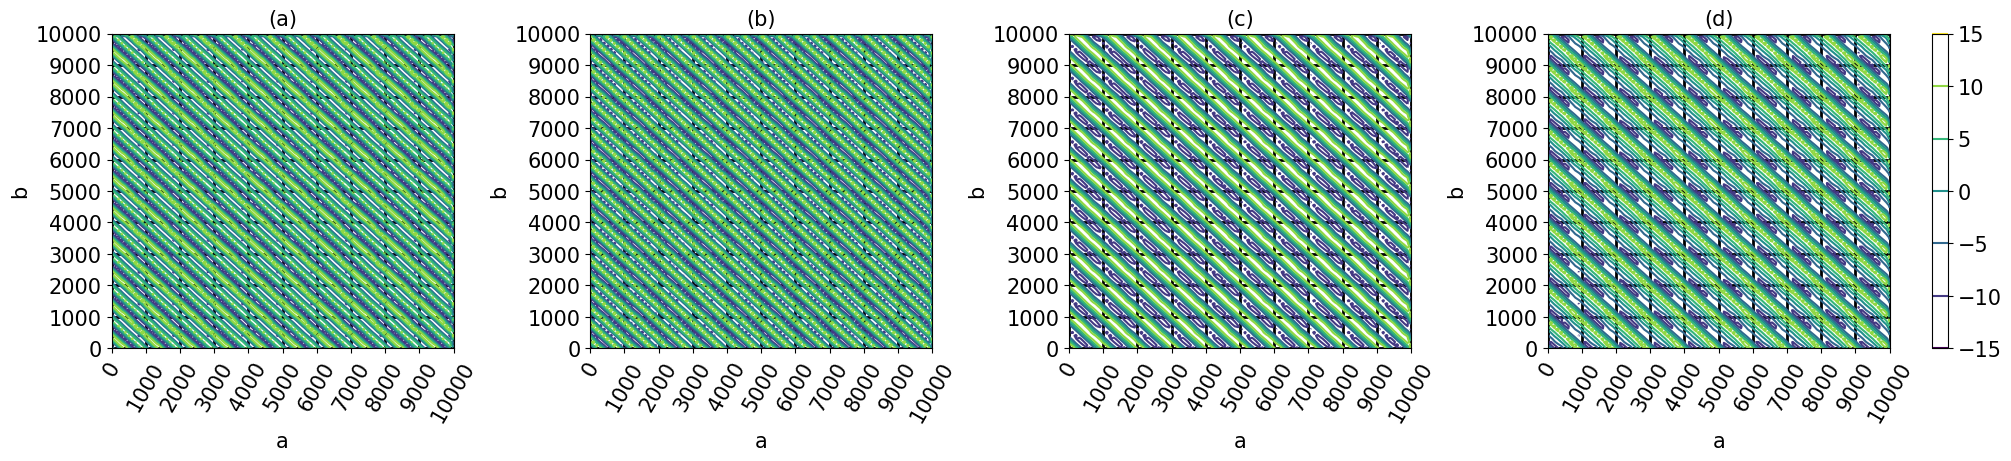

In [10]:
import matplotlib.pyplot as plt
import numpy as np

n_row = 1
n_col = 4
fig_num = n_row*n_col
model_list = ['model_s2.pt']
title_list = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']


fig, axs = plt.subplots(ncols=n_col, nrows=n_row, figsize=(20.0, 4.5), layout='constrained')
plt.style.use('default')
colorbar_img = None
for i in range(fig_num):
    img = plot_model_represent_contour(axs.flatten()[i], model_list[0], id_pca=i, num_interval=100, fig_title=title_list[i])
    # plt.colorbar(img, ax=axs.flatten()[i])
    if colorbar_img is None:
        colorbar_img = img
        
    if i == n_col-1: 
        cbar = plt.colorbar(colorbar_img, ax=axs.flatten()[i])
        cbar.ax.tick_params(labelsize=15) 
    
plt.savefig(f'img/fig_addition_representation_100.pdf', dpi=400)
plt.show()
plt.close()
